# Machine Learning Lab

This lab is aimed to walk you through the complete workflow of a machine learning project; from data wrangling, exploratory data analysis (EDA), model training and model evaluation/comparison. 

You will work with your machine project teamates for this lab and your team needs to decide whether to use either R or Python as the main programming language. You can split up the work for each question, but **you should solve every question in the lab as a team**. Please submit either a file with a link to the GitHub repository (either your fork of the master repo or the master repo itself) or a Jupyter Notebook that contains your completed work.

We will use Github for team collaboration and it can be broken down into following steps:

1. The team leader creates a public Github repository under his/her account first.

2. All the other team members fork the repo so you will have a COPY of the repo under your account

3. Git clone YOUR OWN repo otherwise you won't be able to push later.

4. Create a subfolder under your name and finish your code. Push the changes to Github. *Note*: you might want to put csv file and system file in the gitignore.

5. Go to the Github page of YOUR OWN repository and click the "Pull Request" tab. You can find the details [here](https://help.github.com/articles/creating-a-pull-request-from-a-fork/)

6. Submit the pull request so you can see it under team leader's repository.

7. Pair review each other's code before merging it to the master branch.


**Homework**

- To sync all the changes made by your teammates to your own repository, follow the instructions under the "Keeping Your Fork Up to Date" section [here](https://gist.github.com/Chaser324/ce0505fbed06b947d962).

- To understand fork, pull request and branch better, review [this video](https://youtu.be/_NrSWLQsDL4) in 1.25X speed.


## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.


### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.


## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”


#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date


#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID


### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Note that there are only less than 5% of the orders have been returned, so you should consider using the [createDataPartition](https://www.rdocumentation.org/packages/caret/versions/6.0-80/topics/createDataPartition) function from `caret` package and [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) from sklearn when running cross-validation.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.


### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.

### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
orders = pd.read_csv('Orders.csv', index_col='Row.ID')

In [3]:
orders.shape

(51290, 23)

In [4]:
orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [5]:
orders[['Profit','Sales']].head(5)

,Profit,Sales
Row.ID,,
40098,$62.15,$221.98
26341,-$288.77,"$3,709.40"
25330,$919.97,"$5,175.17"
13524,-$96.54,"$2,892.51"
47221,$311.52,"$2,832.96"


In [6]:
#Convert to numeric with pd.extract
orders['Profit'] = orders['Profit'].str.replace('$','')
orders['Profit'] = orders['Profit'].str.replace(',','')
orders['Profit'] = pd.to_numeric(orders['Profit'])

<ipython-input-6-f1db207395e6>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders['Profit'] = orders['Profit'].str.replace('$','')


In [7]:
orders['Sales'] = orders['Sales'].str.replace('$','')
orders['Sales'] = orders['Sales'].str.replace(',','')
orders['Sales'] = pd.to_numeric(orders['Sales'])

<ipython-input-7-bce5f72a4dfb>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders['Sales'] = orders['Sales'].str.replace('$','')


In [8]:
orders[['Profit','Sales']].describe()

,Profit,Sales
count,51290.000000,51290.000000
mean,28.610970,246.490685
std,174.341066,487.565388
min,-6599.980000,0.440000
25%,0.000000,30.762500
50%,9.240000,85.055000
75%,36.810000,251.055000
max,8399.980000,22638.480000


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [9]:
orders['Order.Date'].describe()

count       51290
unique       1430
top       6/18/15
freq          135
Name: Order.Date, dtype: object

In [10]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [40]:
orders['month'] = pd.DatetimeIndex(orders['Order.Date']).month
orders['year'] = pd.DatetimeIndex(orders['Order.Date']).year

In [12]:
for col in ['Segment', 'Market', 'Category', 'Sub.Category']:
    print(orders[col].value_counts())
    print('---------------------------')

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64
---------------------------
Asia Pacific    14302
Europe          11729
USCA            10378
LATAM           10294
Africa           4587
Name: Market, dtype: int64
---------------------------
Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64
---------------------------
Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Labels         2601
Fasteners      2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: Sub.Category, dtype: int64
---------------------------


In [21]:
#orders.loc[orders['Order.ID']=='CA-2015-SV20365140-42268']

In [29]:
seasons = orders.groupby('month')[['Quantity','Sales']].agg(['count','sum'])
seasons.head()

Quantity        Sales           
         count    sum count        sum
month                                 
1         2611   8872  2611  676789.30
2         2209   7429  2209  554650.21
3         3007  10390  3007  760518.34
4         3032  10466  3032  695978.86
5         3787  13196  3787  915493.24

In [32]:
seasons.columns

MultiIndex([('Quantity', 'count'),
            ('Quantity',   'sum'),
            (   'Sales', 'count'),
            (   'Sales',   'sum')],
           )

In [30]:
import seaborn as sns

<AxesSubplot:xlabel='month', ylabel="('Sales', 'sum')">

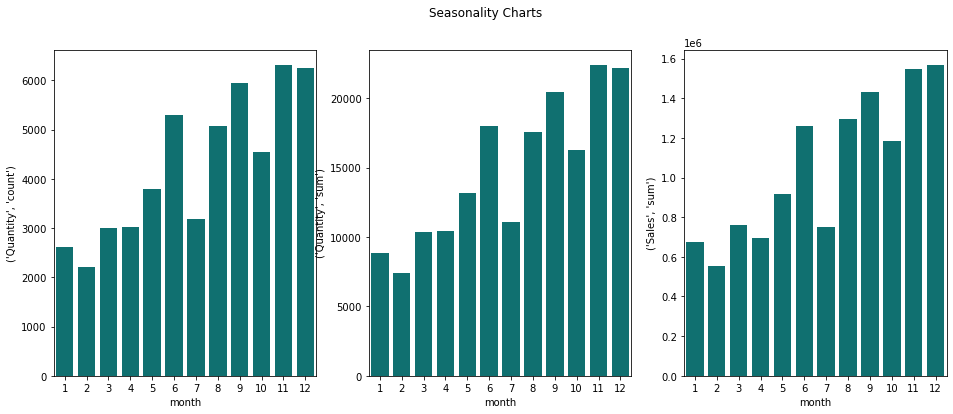

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
fig.suptitle('Seasonality Charts')

sns.barplot(ax=ax1,x=seasons.index,y=('Quantity',   'count'), data=seasons, color='teal')
sns.barplot(ax=ax2,x=seasons.index,y=('Quantity',   'sum'), data=seasons, color='teal')
sns.barplot(ax=ax3,x=seasons.index,y=('Sales',   'sum'), data=seasons, color='teal')

In [68]:
years = orders.groupby(['Category','year','month'])[['Quantity','Sales']].agg(['sum'])
years = years.reset_index()
years['year_month'] = years.year.astype(str) + '_' + years.month.astype(str)

In [69]:
years.columns

MultiIndex([(  'Category',    ''),
            (      'year',    ''),
            (     'month',    ''),
            (  'Quantity', 'sum'),
            (     'Sales', 'sum'),
            ('year_month',    '')],
           )

In [70]:
years.head()

,Category,year,month,Quantity,Sales,year_month
,,,,sum,sum,
0,Furniture,2012,1,246,34463.74,2012_1
1,Furniture,2012,2,278,35799.40,2012_2
2,Furniture,2012,3,319,40277.32,2012_3
3,Furniture,2012,4,326,30689.56,2012_4
4,Furniture,2012,5,409,49768.69,2012_5


<AxesSubplot:xlabel="('year_month', '')", ylabel="('Quantity', 'sum')">

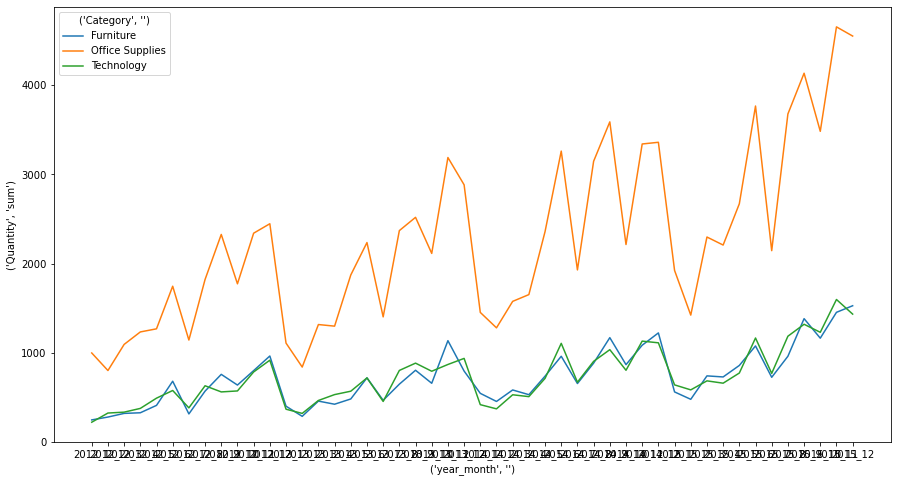

In [73]:
plt.figure(figsize=(15,8))
sns.lineplot(x=('year_month',    ''), y=('Quantity', 'sum'), hue=(  'Category',    '') ,data = years)

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.
1. How much profit did we lose due to returns each year?
2. How many customer returned more than once? more than 5 times?
3. Which regions are more likely to return orders?
4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [129]:
returns = pd.read_csv('Returns.csv')

In [130]:
data = orders.merge(returns, how='left', left_on='Order.ID', right_on='Order ID')

In [131]:
data.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region_x', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority', 'month', 'year', 'Returned',
       'Order ID', 'Region_y'],
      dtype='object')

1. How much profit did we lose due to returns each year?

In [132]:
q1 = data.groupby(['Returned','year'])['Profit'].agg(['sum'])

In [133]:
q1

sum
Returned year          
Yes      2012  17477.26
         2013   9269.89
         2014  17510.63
         2015  17112.97

2. How many customer returned more than once? more than 5 times?

In [134]:
q2 = data.groupby(['Returned','Customer.ID'])['Order.ID'].agg('count')

In [135]:
q2

Returned  Customer.ID 
Yes       AA-1031558      1
          AA-106451404    1
          AA-1064559      3
          AA-1064564      1
          AA-645137       1
                         ..
          WB-218501406    3
          WB-2185064      1
          YS-2188093      1
          ZC-219101402    1
          ZD-2192548      1
Name: Order.ID, Length: 1061, dtype: int64

In [136]:
print(f'customers with more than ONE return: {np.sum(q2 > 1)}')
print(f'customers with more than FIVE return: {np.sum(q2 > 5)}')

customers with more than ONE return: 547
customers with more than FIVE return: 46


3. Which regions are more likely to return orders?

In [170]:
ret_region = data.groupby('Returned')['Region_x'].value_counts().to_frame()

In [160]:
all_region = data['Region_x'].value_counts().to_frame()
all_region = all_region.rename(columns={'Region_x':"Returns"})

In [171]:
ret_region = ret_region.rename(columns={'Region_x':"Returns_count"})

In [173]:
ret_region = ret_region.reset_index()

In [175]:
all_region = all_region.merge(ret_region, how='left', left_index=True, right_on='Region_x')

In [177]:
all_region['Return_ratio'] = all_region.Returns_count / all_region.Returns

In [180]:
all_region.sort_values(by='Return_ratio',ascending=False)

,Returns,Returned,Region_x,Returns_count,Return_ratio
2,3203,Yes,Western US,177,0.055261
7,2374,Yes,Eastern Asia,131,0.055181
8,2113,Yes,Southern Europe,112,0.053005
18,478,Yes,Southern Africa,25,0.052301
11,1620,Yes,Southern US,83,0.051235
5,2848,Yes,Eastern US,134,0.047051
4,3129,Yes,Southeastern Asia,140,0.044743
6,2988,Yes,South America,133,0.044511
10,2440,Yes,Western Asia,108,0.044262
3,3487,Yes,Oceania,154,0.044164


4. Which categories (sub-categories) of products are more likely to be returned?

In [181]:
ret_cat = data.groupby('Returned')['Category'].value_counts().to_frame()

In [184]:
all_cat = data['Category'].value_counts().to_frame()

In [186]:
ret_cat = ret_cat.rename(columns={'Category':'Category_count'}).reset_index()

In [191]:
ret_cat

,Returned,Category,Category_count
0,Yes,Office Supplies,1348
1,Yes,Technology,445
2,Yes,Furniture,427


In [193]:
all_cat = all_cat.merge(ret_cat, left_index=True, right_on='Category')

In [195]:
all_cat['Cat_ratio'] = all_cat['Category_count'] / all_cat['Category_x']

In [197]:
all_cat.sort_values(by='Cat_ratio', ascending=False)

,Category,Category_x,Returned,Category_y,Category_count,Cat_ratio
1,Technology,10141,Yes,Technology,445,0.043881
2,Furniture,9860,Yes,Furniture,427,0.043306
0,Office Supplies,31289,Yes,Office Supplies,1348,0.043082


In [106]:
data.groupby('Returned')['Category'].value_counts()

Returned  Category       
Yes       Office Supplies    1348
          Technology          445
          Furniture           427
Name: Category, dtype: int64

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”


#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date


#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID


In [203]:
data.Returned = data.Returned.replace({np.NaN:0,'Yes':1})

In [205]:
data['Ship.Date'] = pd.to_datetime(data['Ship.Date'])

In [209]:
data['Process.Time'] = data['Ship.Date'] - data['Order.Date']

<AxesSubplot:ylabel='Process.Time'>

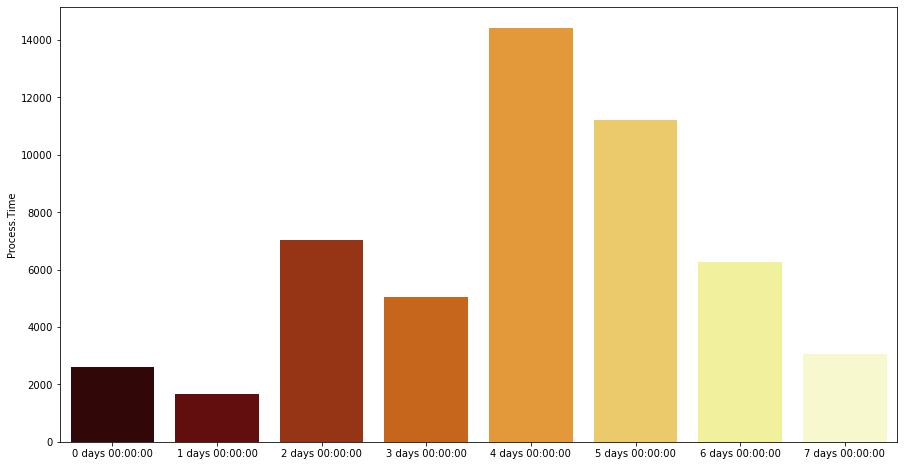

In [225]:
plot = data['Process.Time'].value_counts().to_frame()

plt.figure(figsize=(15,8))
sns.barplot(x=plot.index, y='Process.Time', data=plot, 
            order=plot.index.sort_values(), palette='afmhot')

In [233]:
Prod_ret_dict = data.groupby('Product.ID').count()['Returned'].to_dict()

In [235]:
data['Product.ReturnTimes'] = data.apply(lambda r: Prod_ret_dict[r['Product.ID']],axis=1)

In [237]:
data.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region_x', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority', 'month', 'year', 'Returned',
       'Order ID', 'Region_y', 'Process.Time', 'Product.ReturnTimes'],
      dtype='object')

### Problem 5: Fitting Models
- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Note that there are only less than 5% of the orders have been returned, so you should consider using the [createDataPartition](https://www.rdocumentation.org/packages/caret/versions/6.0-80/topics/createDataPartition) function from `caret` package and [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) from sklearn when running cross-validation.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.

In [295]:
# Set y vector
y = data.Returned

In [296]:
# Ship.Mode, Segment, Region (or Market), Sub.Catergory (or Category), Shipping.Cost,
# Quantity, Discount, Order.Priority, OrderMonth, Process_time, Num_Returns

In [348]:
# Set X matrix
X = data[['Category','Quantity','month','Process.Time','Product.ReturnTimes']]

In [349]:
X['Product.ReturnTimes'].describe()

count    51290.000000
mean        23.867304
std         19.616341
min          1.000000
25%         13.000000
50%         20.000000
75%         32.000000
max        227.000000
Name: Product.ReturnTimes, dtype: float64

In [350]:
X.shape

(51290, 5)

In [351]:
X['Process.Time'] = X['Process.Time'].dt.days

<ipython-input-351-55f331c6c678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Process.Time'] = X['Process.Time'].dt.days


In [352]:
X.head()

,Category,Quantity,month,Process.Time,Product.ReturnTimes
0,Technology,2,11,2,2
1,Furniture,9,2,2,25
2,Technology,9,10,1,24
3,Technology,5,1,2,23
4,Technology,8,11,1,12


In [353]:
X = pd.concat([X, pd.get_dummies(X.Category,drop_first=True)], axis=1)

In [354]:
X.drop('Category', axis=1, inplace=True)

In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)

In [356]:
from sklearn import linear_model
logit_1 = linear_model.LogisticRegression(solver='liblinear')

In [357]:
logit_1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [358]:
logit_1.set_params(random_state=1)

LogisticRegression(random_state=1, solver='liblinear')

In [359]:
logit_1.fit(X_train, Y_train)
logit_1.score(X_test, Y_test)

0.956814193799961

In [360]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, pd.DataFrame(logit_1.predict(X)))

array([[49070,     0],
       [ 2220,     0]], dtype=int64)

## SGDClassifier instead of Linear model?
## Set Class_weight to balanced

In [365]:
from sklearn.linear_model import SGDClassifier

In [384]:
sgd = SGDClassifier(loss='log', max_iter=1e4, l1_ratio=0, alpha=1e-4, shuffle=True, class_weight='balanced')

In [385]:
sgd.fit(X_train, Y_train)
sgd.score(X_test, Y_test)

0.9364398518229674

In [386]:
confusion_matrix(y, pd.DataFrame(sgd.predict(X)))

array([[48030,  1040],
       [ 2148,    72]], dtype=int64)

In [387]:
sgd.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': 'balanced',
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0,
 'learning_rate': 'optimal',
 'loss': 'log',
 'max_iter': 10000.0,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [388]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [389]:
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [390]:
result = {}
for alpha in [0.0001, 0.01, 1, 10, 100, 1000, 10000]:
    sgd.set_params(alpha=alpha)
    result[alpha] = cross_val_score(sgd, X_train, y_train, cv=skf).mean()
    
result

{0.0001: 0.27125079525123164,
 0.01: 0.35838277727343854,
 1: 0.536386434827738,
 10: 0.5321269707849725,
 100: 0.9344658431522095,
 1000: 0.9541333508506632,
 10000: 0.7740677523312892}